# Unit #5 (a) Code

The goal of this notebook is to learn how to implement and interpret one-way and two-way ANOVA and ANCOVA models.

## Problem #1

The goal of the experiment in ["Comparison of Espresso Coffee Brewing Techniques"](https://www.sciencedirect.com/science/article/abs/pii/S0260877413004445) (Parenti et al.) is to "evaluate and compare the differences in terms of quality between espresso coffee made using three different extraction procedures." Quality, in this exercise, is measured in terms of the "foam index". Foam, according to the authors of this study, is a "distinctive feature of espresso coffee, as it is absent in other coffee brews and is required for consumer acceptance."


More compactly, here are the variables in our experimental data set: 

 1. foamIndx: The foam index is defined as the ratio between the foam and liquid volume (vol vol$􏰀^{-1}\%$) measured 30 seconds after extraction

 2. method: Three methods were studied: 
        a. Method 1=Bar Machine(BM); 
        b. Method 2=Hyper-Espresso Method (HIP); and 
        c. Method 3= I-Espresso System (IT).



#### (a) Load the data into R, and recode the ${\tt method}$ variables as a factor with three levels:

1. "1" = "Bar Machine"
2. "2" = "Hyper-Espresso Method"
3. "3" = "I-Espresso System"

In [1]:
library(tidyverse)
esp = read.table("https://www.colorado.edu/amath/sites/default/files/attached-files/espresso1.txt", header = TRUE, sep = "\t")
esp$method = as_factor(esp$method); 
esp$method = recode(esp$method, '1' = 'Bar Machine', '2' = "Hyper-Espresso Method", '3' = 'I-Espresso System'); 
head(esp)


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


foamIndx,method
36.64,Bar Machine
39.65,Bar Machine
37.74,Bar Machine
35.96,Bar Machine
38.52,Bar Machine
21.02,Bar Machine


#### (b) Print a numerical summary of the data. How many replications are there in each group?

In [2]:
summary(esp)

    foamIndx                       method 
 Min.   :21.02   Bar Machine          :9  
 1st Qu.:35.66   Hyper-Espresso Method:9  
 Median :38.52   I-Espresso System    :9  
 Mean   :44.47                            
 3rd Qu.:55.23                            
 Max.   :73.19                            

There are 9 replications in each group. 

#### (c) Produce a boxplot or violin plot of the data (foam index vs method). Visually assess the differences in mean foam index across methods. Summarize your assessment.

Loading required package: lattice
Loading required package: survival
Loading required package: Formula

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:dplyr’:

    src, summarize

The following objects are masked from ‘package:base’:

    format.pval, units

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.


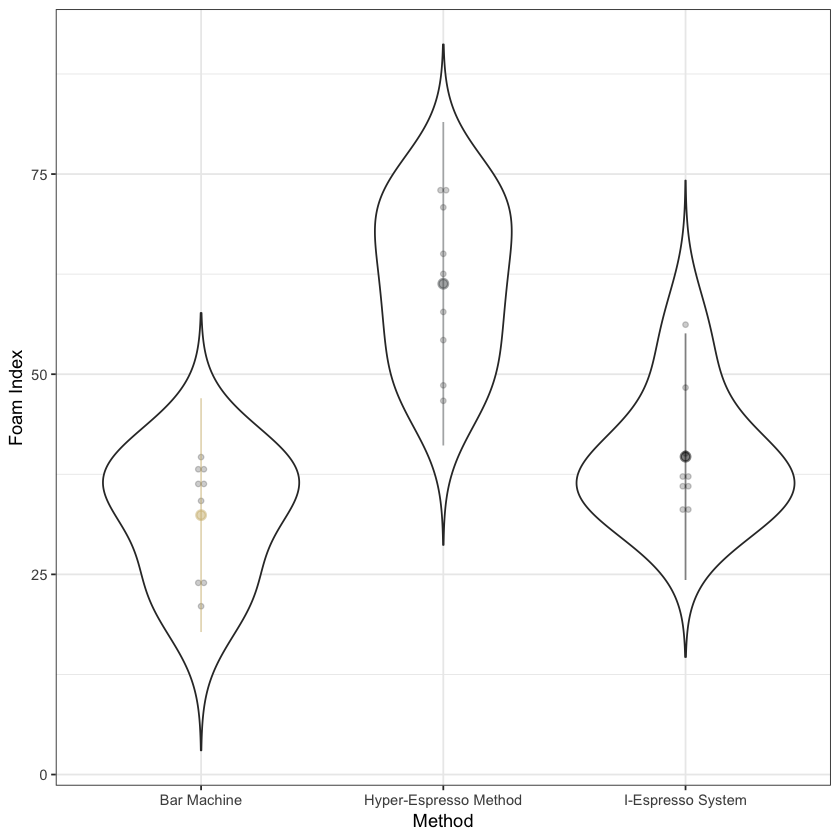

In [3]:
library(ggplot2)
library(Hmisc)
p = ggplot(esp, aes(x = method, y = foamIndx)) + # + geom_boxplot(aes(x = group , y = weight))
    geom_violin(trim = FALSE, bw = 6) +
    #geom_boxplot(width = 0.1, alpha = 0.5, fill = c('#CFB87C', '#565A5C', "A2A4A3")) + 
    geom_dotplot(binaxis = 'y', stackdir = 'center', dotsize = 0.4, alpha = 0.2) +
    stat_summary(fun.data = mean_sdl, color = c('#CFB87C', '#565A5C', 'black'), alpha = 0.5) +
    xlab("Method") + ylab("Foam Index") + 
    theme_bw(); 
p

It appears that the hyper-espresso method is highest on average, with the I-espresso method second highest. 

#### (d) Conduct a one-way ANOVA on this data. What is the mean foam index of each method?

In [19]:
esp_mod = lm(foamIndx ~ method, esp)
summary(esp_mod)
hem = as.numeric(coef(esp_mod)[1] + coef(esp_mod)[2])
hem
iem = as.numeric(coef(esp_mod)[1] + coef(esp_mod)[3])
iem


Call:
lm(formula = foamIndx ~ method, data = esp)

Residuals:
   Min     1Q Median     3Q    Max 
-14.62  -6.60   0.41   5.73  16.49 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   32.400      2.819  11.492 3.04e-11 ***
methodHyper-Espresso Method   28.900      3.987   7.248 1.73e-07 ***
methodI-Espresso System        7.300      3.987   1.831   0.0796 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.458 on 24 degrees of freedom
Multiple R-squared:  0.7031,	Adjusted R-squared:  0.6783 
F-statistic: 28.41 on 2 and 24 DF,  p-value: 4.699e-07


[1] 61.3

[1] 39.7

The mean foam index for the `bar method` is $32.4$, `hyper-espresso` is $28.9$, and `I-espresso` is $7.3$ 

#### (e)  Use statistical evidence to draw a conclusion about whether there are differences in mean foam index across methods.

The full f-test is significant at any reasonable level, which suggest that there is a difference, with respect to the mean foam index, across groups.

## Problem #2

### (Notice that I am giving you the code for this problem. We will walk through it in class.)

To demonstrate how interaction terms work in an ANCOVA model, let's generate some data. First, we consider the model 

$$Y_i = \beta_0 + \beta_1 X + \beta_2 Z + \beta_3XZ + \varepsilon_i$$

where $X$ is a continuous covariate, $Z$ is a dummy variable coding the levels of a two level factor, and $\varepsilon_i \overset{iid}{\sim} N(0,\sigma^2)$. We choose values for the parameters below (b0,...,b3). 

First, notice that $\beta_3 = 0$. In this case, we can think about having two separate regression lines--one for $Y$ against $X$ when the unit is in group $Z = 0$ and another for $Y$ against $X$ when the unit is in group $Z = 1$. What do we notice about the slope of each of these lines?


x,z,y
0.09159879,1,6.290179
1.96439135,1,10.168612
0.57805656,1,7.200027
0.03370108,0,1.289331
1.82614045,0,4.470862
0.71220319,0,2.485743


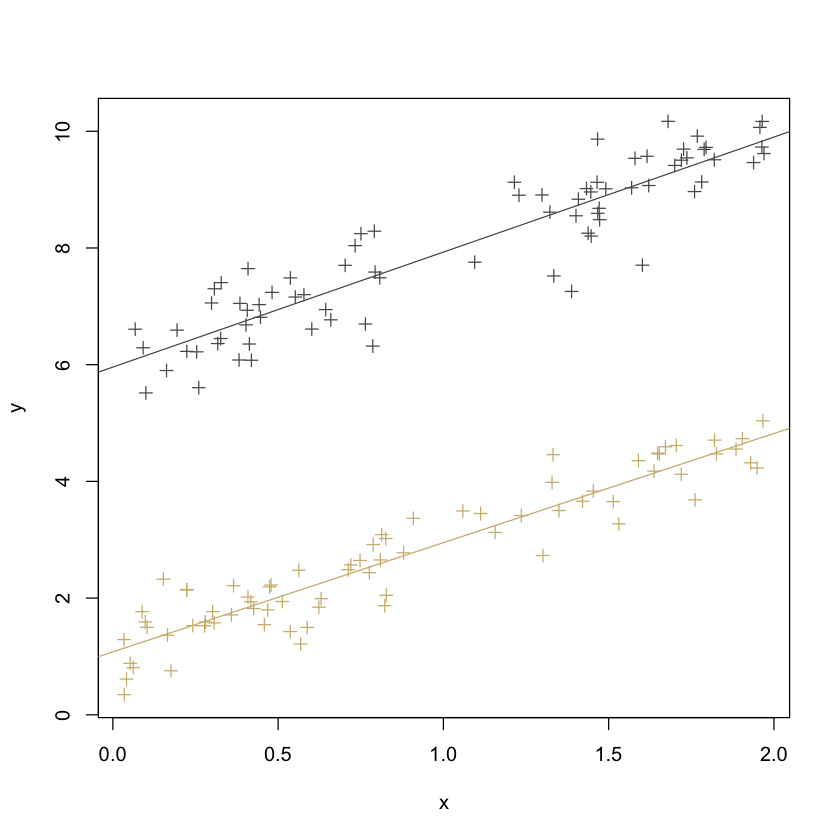

In [20]:
rm(list = ls())
set.seed(99)

#simulate data
n = 150
b0 = 1; b1 = 2; b2 = 5; b3 = 0; eps = rnorm(n, 0, 0.5);
x = runif(n,0,2); z = runif(n,-2,2);
z = ifelse(z > 0,1,0); 
y = b0 + b1*x + b2*z - b3*(x*z) + eps
df = data.frame(x = x,z = as.factor(z),y = y)
head(df)

#plot separate regression lines
with(df, plot(x,y, pch = 3, col = c("#CFB87C","#565A5C")[z]))
abline(coef(lm(y[z == 0] ~ x[z == 0], data = df)), col = "#CFB87C")
abline(coef(lm(y[z == 1] ~ x[z == 1], data = df)), col = "#565A5C")

#### Now, let's add the interaction term (let $\beta_3 = 3$). What happens to the slopes of each line?

x,z,y
0.09159879,1,6.564975
1.96439135,1,16.061786
0.57805656,1,8.934197
0.03370108,0,1.289331
1.82614045,0,4.470862
0.71220319,0,2.485743



Call:
lm(formula = y ~ x + z, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2228 -0.9044  0.1285  0.8249  2.0822 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.2856     0.1748  -1.634    0.104    
x             3.4573     0.1429  24.195   <2e-16 ***
z1            7.8208     0.1754  44.600   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.062 on 147 degrees of freedom
Multiple R-squared:  0.9526,	Adjusted R-squared:  0.952 
F-statistic:  1478 on 2 and 147 DF,  p-value: < 2.2e-16



Call:
lm(formula = y[z == 0] ~ x[z == 0], data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.92808 -0.25958  0.03177  0.29391  0.96003 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.07854    0.08448   12.77   <2e-16 ***
x[z == 0]    1.87232    0.08017   23.35   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4164 on 71 degrees of freedom
Multiple R-squared:  0.8848,	Adjusted R-squared:  0.8832 
F-statistic: 545.4 on 1 and 71 DF,  p-value: < 2.2e-16



Call:
lm(formula = y[z == 1] ~ x[z == 1], data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.43962 -0.31643  0.09974  0.33339  1.01539 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.95902    0.11969   49.79   <2e-16 ***
x[z == 1]    4.97128    0.09937   50.03   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5281 on 75 degrees of freedom
Multiple R-squared:  0.9709,	Adjusted R-squared:  0.9705 
F-statistic:  2503 on 1 and 75 DF,  p-value: < 2.2e-16



Call:
lm(formula = y ~ x + z + x * z, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.43962 -0.28033  0.04971  0.32841  1.01539 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.07854    0.09678   11.14   <2e-16 ***
x            1.87232    0.09185   20.39   <2e-16 ***
z1           4.88048    0.14511   33.63   <2e-16 ***
x:z1         3.09895    0.12843   24.13   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4771 on 146 degrees of freedom
Multiple R-squared:  0.9905,	Adjusted R-squared:  0.9903 
F-statistic:  5075 on 3 and 146 DF,  p-value: < 2.2e-16


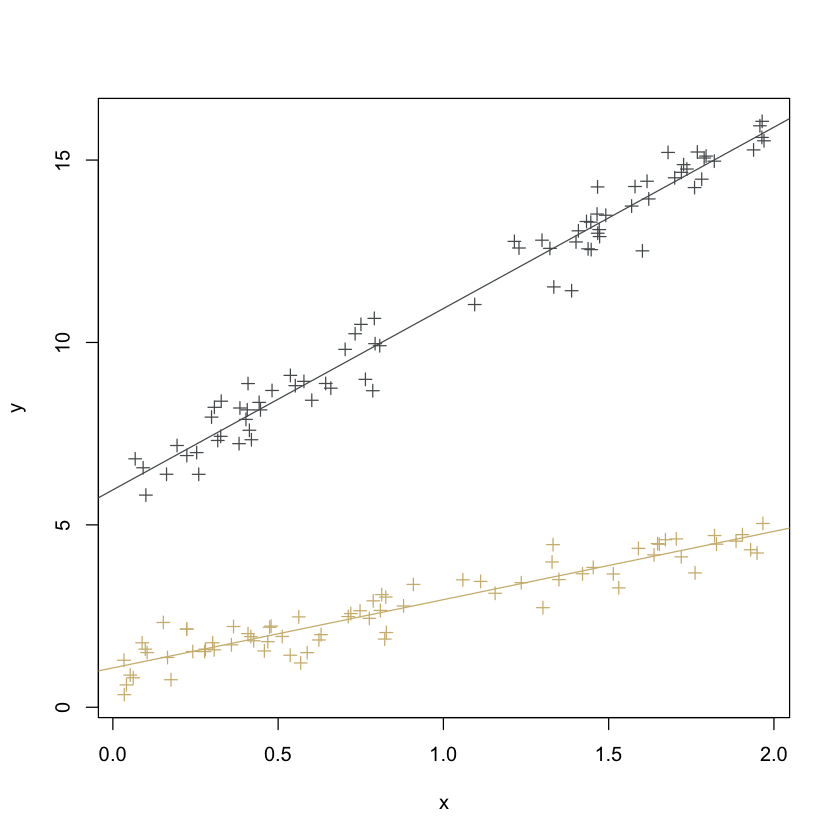

In [6]:
#simulate data
set.seed(99)
n = 150
b0 = 1; b1 = 2; b2 = 5; b3 = 3; eps = rnorm(n, 0, 0.5); 
y = b0 + b1*x + b2*z + b3*(x*z) + eps
df = data.frame(x = x,z = as.factor(z),y = y)
head(df)

lmod = lm(y ~ x + z, data = df)
lmodz0 = lm(y[z == 0] ~ x[z == 0], data = df)
lmodz1 = lm(y[z == 1] ~ x[z == 1], data = df)
summary(lmod)
summary(lmodz0)
summary(lmodz1)

lmodInt = lm(y ~ x + z + x*z, data = df)
summary(lmodInt)

#plot separate regression lines
with(df, plot(x,y, pch = 3, col = c("#CFB87C","#565A5C")[z]))
abline(coef(lm(y[z == 0] ~ x[z == 0], data = df)), col = "#CFB87C")
abline(coef(lm(y[z == 1] ~ x[z == 1], data = df)), col = "#565A5C")

## Problem #3

Load the mtcars dataset. The goal if this question will be to try to explain the variability in miles per gallon (mpg) using transmission type (am), while adjusting for horsepower (hp).

#### (a) Rename the levels of am from 0 and 1 to "Automatic" and "Manual" (one option for this is to use the revalue() function in the plyr package). Then, create a boxplot (or violin plot) of mpg against am. What do you notice? What is the difference in the mean of mpg for cars in the Automatic group vs the Manual group?

In [2]:
library(tidyverse)
library(plyr)
library(ggplot2)
data(mtcars)
mtcars$amf = as.factor(mtcars$am)
mtcars$amf = with(mtcars, revalue(amf, c('0' = "Automatic", '1' = 'Manual')))
head(mtcars)
summary(mtcars)
diff = with(mtcars, mean(mpg[amf == 'Manual']) - mean(mpg[amf == 'Automatic']))
diff

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,amf
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4,Manual
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4,Manual
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1,Manual
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1,Automatic
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2,Automatic
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1,Automatic


      mpg             cyl             disp             hp       
 Min.   :10.40   Min.   :4.000   Min.   : 71.1   Min.   : 52.0  
 1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.8   1st Qu.: 96.5  
 Median :19.20   Median :6.000   Median :196.3   Median :123.0  
 Mean   :20.09   Mean   :6.188   Mean   :230.7   Mean   :146.7  
 3rd Qu.:22.80   3rd Qu.:8.000   3rd Qu.:326.0   3rd Qu.:180.0  
 Max.   :33.90   Max.   :8.000   Max.   :472.0   Max.   :335.0  
      drat             wt             qsec             vs        
 Min.   :2.760   Min.   :1.513   Min.   :14.50   Min.   :0.0000  
 1st Qu.:3.080   1st Qu.:2.581   1st Qu.:16.89   1st Qu.:0.0000  
 Median :3.695   Median :3.325   Median :17.71   Median :0.0000  
 Mean   :3.597   Mean   :3.217   Mean   :17.85   Mean   :0.4375  
 3rd Qu.:3.920   3rd Qu.:3.610   3rd Qu.:18.90   3rd Qu.:1.0000  
 Max.   :4.930   Max.   :5.424   Max.   :22.90   Max.   :1.0000  
       am              gear            carb              amf    
 Min.   :0.0000   

[1] 7.244939

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.


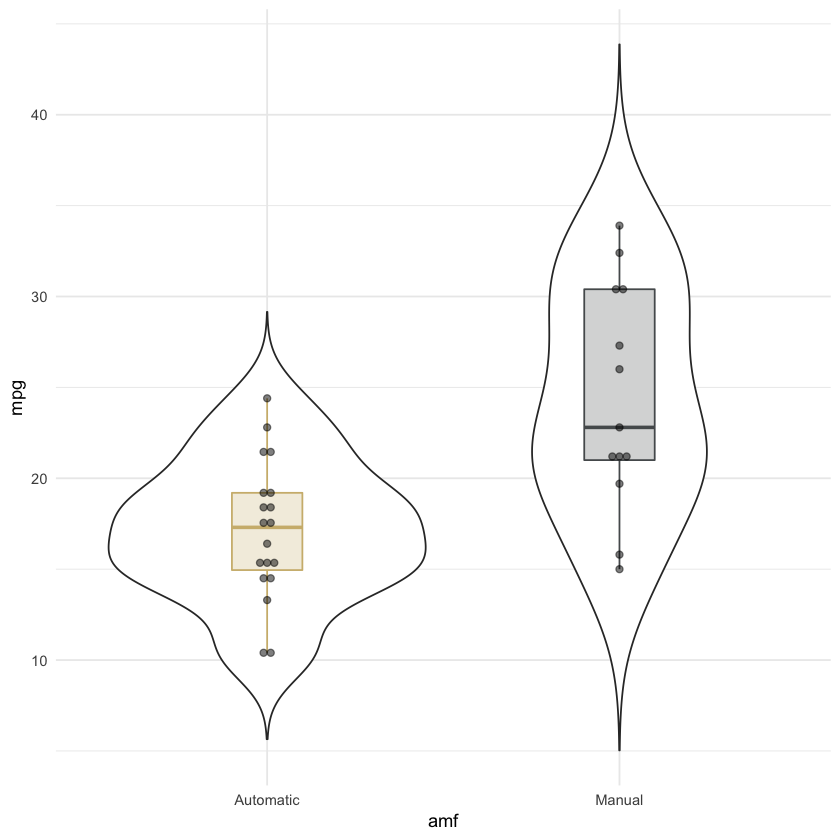

In [30]:
p = ggplot(mtcars, aes(x = amf, y = mpg)) +
    geom_violin(trim=FALSE) + 
    geom_boxplot(width = 0.2, col = c("#CFB87C", '#565A5C'), fill = c("#CFB87C", '#565A5C'), alpha = 0.25) + 
    theme_minimal() + 
    geom_dotplot(binaxis = 'y', stackdir='center', dotsize = 0.5, alpha = 0.5)
p 

The difference in the mean of mpg for cars in teh Automatic group vs the Manual group is -7.2449 (i.e. manual is higher on average)

#### (b) Construct three models: 

1. An ANOVA model that checks for differences in mean mpg across different transmission types. 
2. An ANCOVA model that checks for differences in mean mpg across different transmission types, adjusting for horsepower.
3. An ANCOVA model that checks for differences in mean mpg across different transmission types, adjusting for horsepower and for interaction effects between horsepower and transmission type.

#### Is the interaction term significant?

In [31]:
anov = lm(mpg ~ amf, mtcars)
summary(anov)

anc = lm(mpg ~ hp + amf, mtcars)
summary(anc)

ancInt = lm(mpg ~ hp + amf + amf:hp, mtcars)
summary(ancInt)


Call:
lm(formula = mpg ~ amf, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.3923 -3.0923 -0.2974  3.2439  9.5077 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   17.147      1.125  15.247 1.13e-15 ***
amfManual      7.245      1.764   4.106 0.000285 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.902 on 30 degrees of freedom
Multiple R-squared:  0.3598,	Adjusted R-squared:  0.3385 
F-statistic: 16.86 on 1 and 30 DF,  p-value: 0.000285



Call:
lm(formula = mpg ~ hp + amf, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3843 -2.2642  0.1366  1.6968  5.8657 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 26.584914   1.425094  18.655  < 2e-16 ***
hp          -0.058888   0.007857  -7.495 2.92e-08 ***
amfManual    5.277085   1.079541   4.888 3.46e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.909 on 29 degrees of freedom
Multiple R-squared:  0.782,	Adjusted R-squared:  0.767 
F-statistic: 52.02 on 2 and 29 DF,  p-value: 2.55e-10



Call:
lm(formula = mpg ~ hp + amf + amf:hp, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3818 -2.2696  0.1344  1.7058  5.8752 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  26.6248479  2.1829432  12.197 1.01e-12 ***
hp           -0.0591370  0.0129449  -4.568 9.02e-05 ***
amfManual     5.2176534  2.6650931   1.958   0.0603 .  
hp:amfManual  0.0004029  0.0164602   0.024   0.9806    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.961 on 28 degrees of freedom
Multiple R-squared:  0.782,	Adjusted R-squared:  0.7587 
F-statistic: 33.49 on 3 and 28 DF,  p-value: 2.112e-09


The p-value associated with the interaction parameter is large, providing no evidence of an interaction. So, we can use the ANCOVA model without an interaction. 

#### (c) Construct a plot of mpg against horsepower, and color points based in transmission type. Then, overlay the regression lines with the interaction term, and the lines without. How are these lines consistent with your answer in (b)?

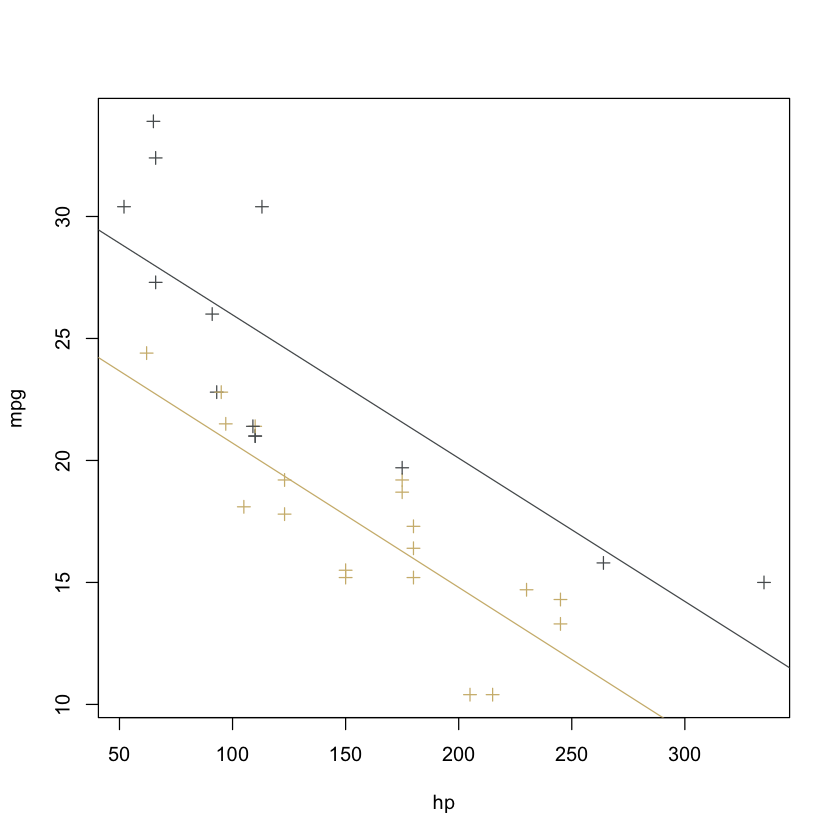

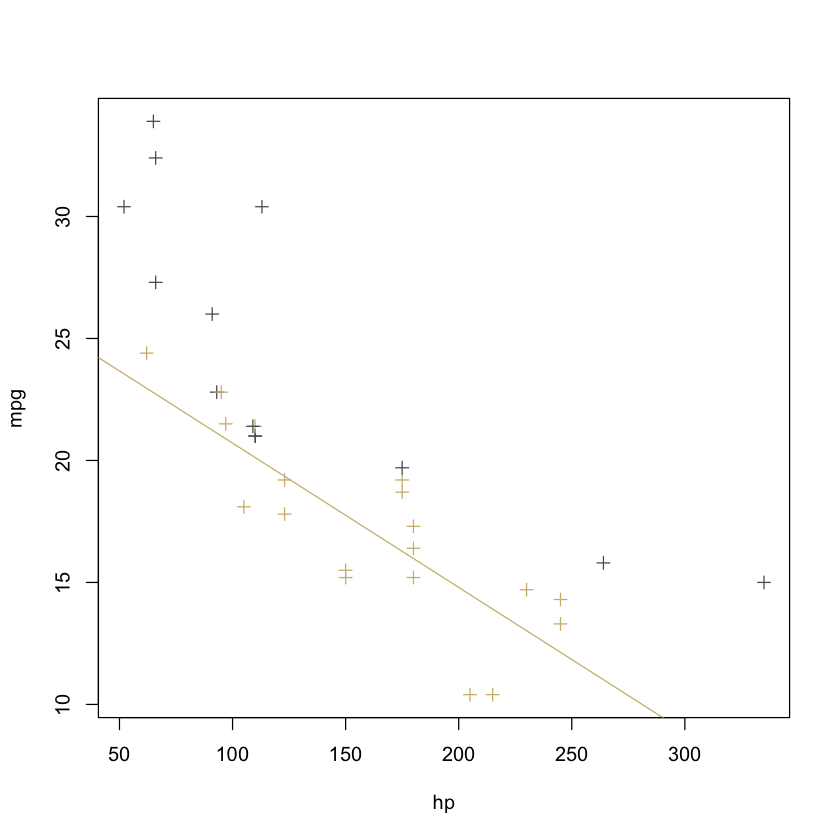

hp 
-0.05873409

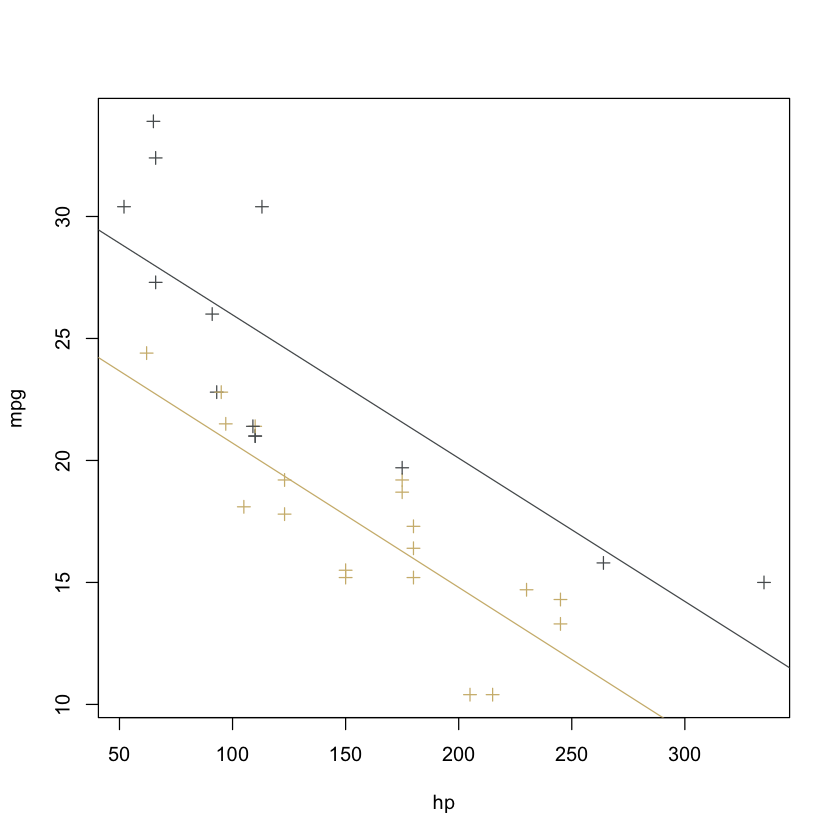

In [33]:
with(mtcars, plot(hp, mpg, pch = 3, col = c("#CFB87C", '#565A5C')[amf]))
abline(coef(lm(mpg[am == 0] ~ hp[am == 0], mtcars)), col = '#CFB87C')
abline(coef(lm(mpg[am == 1] ~ hp[am == 1], mtcars)), col = '#565A5C')

with(mtcars, plot(hp, mpg, pch = 3, col = c("#CFB87C", '#565A5C')[amf]))
abline(coef(lm(mpg[am == 0] ~ hp[am == 0], mtcars)), col = '#CFB87C')

with(mtcars, plot(hp, mpg, pch = 3, col = c("#CFB87C", '#565A5C')[amf]))
abline(coef(lm(mpg[am == 0] ~ hp[am == 0], mtcars)), col = '#CFB87C')

with(mtcars, abline(coef(ancInt)[1] + coef(ancInt)[3],
                    coef(ancInt)[2] + coef(ancInt)[4], col = '#565A5C'))
coef(ancInt)[2] + coef(ancInt)[4]

## Problem #4

Impact of Launderings on Physsical Properties," International Journal
of Clothing Science and Technology, Vol. 18, 1/2, pp. 43-52.

Description: Effects of Laundering Cycles and denim treatment
on edge abrasion of denim jeans. Data simulated to match means/SDs

Variables/Columns:
1. Laundry Cycles:  1= Control (Zero Launderings), 2=5 Launderings, 3=25  
2. Denim Treatment: 1=Pre-washed, 2=Stone-Washed, 3=Enzyme Washed 
3. Edge abrasion Score: Lower scores mean higher damage  

#### (a) Read in the denim data. Convert the cycle and treatment variables into factors, and recode the factors as follows:

1. cycle: "1" = "Control", "2" = "5 Launderings", "3" = "25 Launderings"
2. treatment: "1" = "Pre-Washed", "2" = "Stone-Washed", "3" = "Enzyme Washed"

In [4]:
denim = read.table("https://www.colorado.edu/amath/sites/default/files/attached-files/denim.txt", header = TRUE, sep = "")
head(denim)


cycle,treatment,score
1,1,3.2218
1,1,3.3547
1,1,3.1334
1,1,2.6289
1,1,3.8816
1,1,3.4383


#### (a) Use the code below to construct interaction plots for cycle and treatment. Comment on these plots.

In [5]:
library(tidyverse)
library(plyr)

denim %>% 
  ggplot() +
  aes(x = FACTOR1, color = FACTOR2, group = FACTOR2, y = RESPONSE) +
  stat_summary(fun.y = mean, geom = "point") +
  stat_summary(fun.y = mean, geom = "line")

In [ ]:
denim %>% 
  ggplot() +
  aes(x = FACTOR2, color = FACTOR1, group = FACTOR1, y = RESPONSE) +
  stat_summary(fun.y = mean, geom = "point") +
  stat_summary(fun.y = mean, geom = "line")

#### (b) Construct a two-way ANOVA model with the factors cycle and treatment. Do not include an interaction term. Assuming that this model is correct, write down the mean edge abrasion score for:

1. Pre-Washed jeans after zero launderings.
2. Stone-Washed jeans after 25 launderings.
3. Enzyme Washed jeans after zero launderings.

#### (c) Now fit the two-way ANOVA model from part (b), but with an interaction term. Conduct a test for whether the interaction is statistically significant. Clearly state the reasoning and conclusion of your test.